In [24]:
import matplotlib
from pylab import *
import networkx as nx
import random as rd
import pycxsimulator
import numpy as np

In [16]:
def initialize(n, p_e, p_i):
    global g
    g = nx.erdos_renyi_graph(n = n, p = p_e)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < p_i else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    
def update(p_i, p_r):
    global g
    for a in g.nodes:
        if g.nodes[a]['state'] == 0:
            b = rd.choice(list(g.neighbors(a)))
            if g.nodes[b]['state'] == 1:
                g.nodes[a]['state'] = 1 if random() < p_i else 0
        else:
            g.nodes[a]['state'] = 0 if random() < p_r else 1

In [17]:
def simulate(n, p_e, p_i, p_r):
    
    initialize(n, p_e, p_i)
    for i in range(10):
        update(p_i, p_r)
    observe()

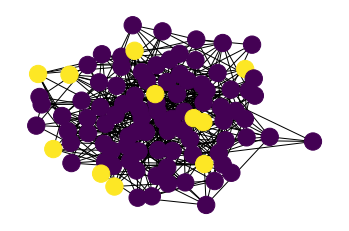

In [20]:
simulate(100, 0.1, 0.5, 0.5)

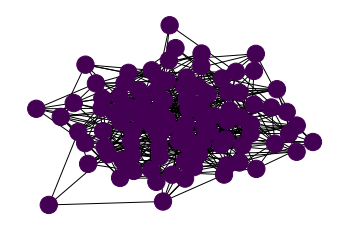

In [21]:
simulate(100, 0.1, 0.04, 0.5)


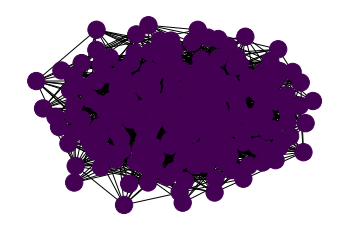

In [22]:
simulate(200, 0.1, 0.04, 0.5)


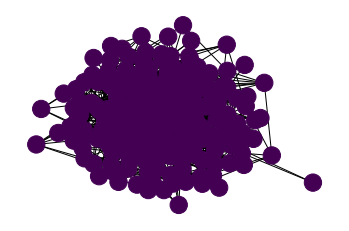

In [23]:
simulate(200, 0.05, 0.04, 0.5)


**Question:** Why does using synchronous or asynchronous updating make a
difference?

With synchronous update we reach the equilibrium faster since it updates the entire network in one instance.

**Question:** For the mean-field approximation described in Section 18.5, why is it appropriate to use the synchronous update method and not the asynchronous one?

The syncrhonous update is appropriate since all of the nodes in the system are the same, so we should preserve the probabilities set for infection, recovery and connectedness for all nodes from one state to another.

In [25]:
nodes = 1000
edges = 20000
neighbors = 40
p_connection = neighbors/nodes

e_r_graph = nx.erdos_renyi_graph(n = nodes, p = p_connection)
w_s_graph = nx.watts_strogatz_graph(n = nodes, k = neighbors, p = np.random.rand())
b_a_graph = nx.barabasi_albert_graph(n = nodes, m = neighbors - 20)

def average_degree(graph):
    degrees = []
    for i in range(len(graph.nodes)):
        degrees.append(graph.degree[i])
        
    return np.mean(degrees)

In [26]:
print(average_degree(e_r_graph))
print(average_degree(w_s_graph))
print(average_degree(b_a_graph))

39.544
40.0
39.2
